# Python Final Project

Database: 
Process: 
EDA: Frequest words in in top movies, frequent words in descriotion on movies that failed. 
What are we looking for? Predict movie rating based on reviews. Predict revenues based on reviews, ratings. Predict ratings/ revenues based on text description. Revenue box plot by year/ decade. Ratings distirbution by year. 
What did we find:
Questions: 
Future Studies: 

In [352]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [396]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import re
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

In [354]:
movies_metadata = pd.read_csv('data/movies_metadata.csv')

C:\Users\KKUMAR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [355]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [356]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [357]:
movies_metadata['id'] = movies_metadata['id'].map(lambda x: x.replace('-',''))

In [358]:
movies_metadata['id'] = pd.to_numeric(movies_metadata.id)
movies_metadata['revenue'] = pd.to_numeric(movies_metadata.revenue)
movies_metadata['runtime'] = pd.to_numeric(movies_metadata.runtime)
movies_metadata['vote_average'] = pd.to_numeric(movies_metadata.vote_average)
movies_metadata['vote_count'] = pd.to_numeric(movies_metadata.vote_count)

In [359]:
movies_metadata['release_date'].loc[377]

'1994-06-17'

In [360]:
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')
movies = movies_metadata.set_index('release_date')

In [361]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45466 entries, 1995-10-30 to 2017-06-09
Data columns (total 23 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null int64
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null object
tagline                  2041

In [362]:
movies['year'] = movies.index.year
movies['decade'] = (movies.year//10)*10

In [363]:
movies.sort_values('revenue',ascending=False).tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,decade
release_date,,,,,,,,,,,,,,,,,,,,,
NaT,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",19970820,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",20120929,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",20140101,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [364]:
movies_revenue = movies[movies['revenue']>1000000]
movies_revenue = movies_revenue[movies_revenue['decade']>1960]
movies_revenue = movies_revenue[movies_revenue['original_language'] == 'en']
movies_revenue = movies_revenue[movies_revenue['tagline'].isna() == False]

In [365]:
movies_revenue.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4541 entries, 1995-12-15 to 2017-08-03
Data columns (total 25 columns):
adult                    4541 non-null object
belongs_to_collection    1129 non-null object
budget                   4541 non-null object
genres                   4541 non-null object
homepage                 1587 non-null object
id                       4541 non-null int64
imdb_id                  4541 non-null object
original_language        4541 non-null object
original_title           4541 non-null object
overview                 4541 non-null object
popularity               4541 non-null object
poster_path              4541 non-null object
production_companies     4541 non-null object
production_countries     4541 non-null object
revenue                  4541 non-null float64
runtime                  4541 non-null float64
spoken_languages         4541 non-null object
status                   4541 non-null object
tagline                  4541 non-null object


In [366]:
movies_revenue.sort_values('revenue', ascending=True).head(100)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,decade
release_date,,,,,,,,,,,,,,,,,,,,,
1993-10-08,False,NaN,800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,47889,tt0108000,en,Ruby in Paradise,"Reeling from her mother's recent death, Ruby L...",...,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A woman's search for herself.,Ruby in Paradise,False,5.6,10.0,1993.0,1990.0
2012-09-07,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,121872,tt2115295,en,Ginger & Rosa,A look at the lives of two teenage girls - ins...,...,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friendship pulled them together. Love tore the...,Ginger & Rosa,False,6.4,79.0,2012.0,2010.0
1994-12-02,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,29973,tt0109450,en,Cobb,Al Stump is a famous sports-writer chosen by T...,...,128.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Everyone hated this baseball legend. And he lo...,Cobb,False,6.1,29.0,1994.0,1990.0
2009-01-20,False,NaN,1700000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,17680,tt1103982,en,The Girlfriend Experience,"Chelsea is an in-demand call girl whose $2,000...",...,77.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,See it with someone you ****,The Girlfriend Experience,False,5.2,83.0,2009.0,2000.0
1991-06-21,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,20712,tt0103253,en,Whore,This melodrama investigates the life of a pros...,...,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,If You're Afraid to Say It... Just See It.,Whore,False,5.6,18.0,1991.0,1990.0
2009-02-06,False,NaN,20000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,18476,tt0892767,en,Horsemen,A recently widowed detective still grieving ov...,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Four victims. Four painful secrets.,Horsemen,False,5.5,124.0,2009.0,2000.0
2014-09-05,False,NaN,6000000,"[{'id': 18, 'name': 'Drama'}]",NaN,286521,tt2933544,en,5 Flights Up,A long-time married couple who've spent their ...,...,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A coming of age story,5 Flights Up,False,5.9,92.0,2014.0,2010.0
2001-04-21,False,NaN,600000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,43664,tt0281680,en,"The Bread, My Sweet",Dominic works round the clock: nights making b...,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,In Italian a good man is a piece of bread.,"The Bread, My Sweet",False,5.0,6.0,2001.0,2000.0
2007-01-24,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.firstlookstudios.com/films/king/,5718,tt0388182,en,King of California,Charlie gets released from an insane asylum an...,...,93.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,You've got to believe in treasure to find it.,King of California,False,6.5,104.0,2007.0,2000.0


## Basic EDA

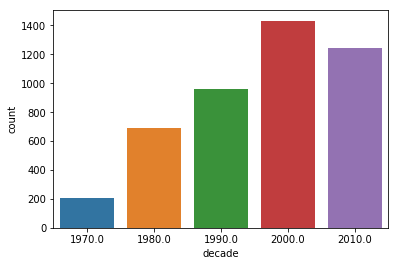

In [367]:
# Number of movies by decade
sns.countplot(x='decade',data=movies_revenue);

In [368]:
revenue_by_decade = movies_revenue.groupby('decade')['revenue'].sum()/100000000

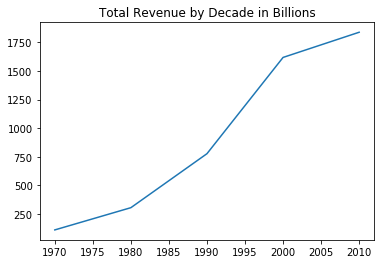

In [369]:
plt.plot(revenue_by_decade)
plt.title('Total Revenue by Decade in Billions');

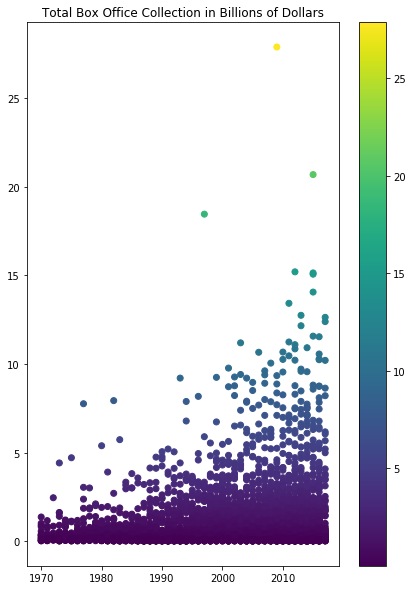

In [370]:
# Scatter plot of box office revenue in billions and year. 
plt.figure(figsize = (7, 10))
plt.scatter(movies_revenue.year, movies_revenue.revenue/100000000, c = movies_revenue.revenue/100000000)
plt.colorbar();
plt.title("Total Box Office Collection in Billions of Dollars");

In [371]:
movies_revenue['revenue_billions'] = movies_revenue['revenue']/1000000000

In [372]:
plot_data = movies_revenue[['original_title','revenue_billions']].sort_values('revenue_billions', ascending=False).head(10)

Text(0.5,1,'Top 10 grossing movies of all time')

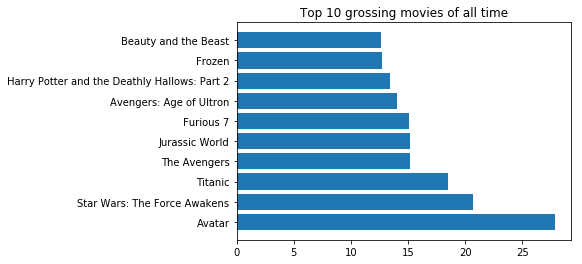

In [373]:
plt.barh(y=plot_data.original_title,width=plot_data.revenue_billions*10);
plt.title('Top 10 grossing movies of all time')

## Use NLP to predict Total Box Office Revenue for movies released after 1970

In [374]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())

In [375]:
tfi = TfidfVectorizer(stop_words='english')
vect = CountVectorizer(min_df=5, stop_words='english')

In [376]:
movies_revenue.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4541 entries, 1995-12-15 to 2017-08-03
Data columns (total 26 columns):
adult                    4541 non-null object
belongs_to_collection    1129 non-null object
budget                   4541 non-null object
genres                   4541 non-null object
homepage                 1587 non-null object
id                       4541 non-null int64
imdb_id                  4541 non-null object
original_language        4541 non-null object
original_title           4541 non-null object
overview                 4541 non-null object
popularity               4541 non-null object
poster_path              4541 non-null object
production_companies     4541 non-null object
production_countries     4541 non-null object
revenue                  4541 non-null float64
runtime                  4541 non-null float64
spoken_languages         4541 non-null object
status                   4541 non-null object
tagline                  4541 non-null object


### Are certain words/ combination of words in taglines good predictors of success? 

In [377]:
X = movies_revenue.tagline
y = movies_revenue.revenue

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [378]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [383]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
X_train_dtm.shape

(3405, 3849)

In [380]:
# Last 50 features
print((vect.get_feature_names()[-50:]))

['would', 'wouldn', 'wounds', 'wrath', 'wreck', 'write', 'writer', 'writers', 'writing', 'written', 'wrong', 'wrongs', 'wrought', 'xxxx', 'ya', 'yabba', 'yard', 'yay', 'yaz', 'yeah', 'year', 'years', 'yellow', 'yellowstone', 'yells', 'yes', 'yesterday', 'yet', 'yippee', 'york', 'you', 'young', 'your', 'yours', 'yourself', 'youth', 'yule', 'zealand', 'zebra', 'zero', 'zeta', 'zhivago', 'zombies', 'zone', 'zones', 'zoo', 'çok', 'şehre', 'şeyler', '最后的舞者']


In [392]:
# Don't convert to lowercase.
vect = CountVectorizer(min_df=10, max_features=10000, lowercase=False, stop_words='english')
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape
vect.get_feature_names()[-10:]

['way',
 'weapon',
 'wild',
 'woman',
 'won',
 'world',
 'wrong',
 'year',
 'years',
 'young']

In [393]:
# Include 1-grams and 2-grams.
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3405, 19116)

In [397]:
# Initialize stemmer.
stemmer = SnowballStemmer('english')

In [398]:
# Define a function that accepts text and returns a list of lemmas.
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [400]:
# Use split_into_lemmas as the feature extraction function (Warning: SLOW!).
vect = CountVectorizer(analyzer=split_into_lemmas, decode_error='replace')

In [417]:
movies_revenue[['vote_average', 'original_title','decade']].sort_values('vote_average', ascending=False).head()

,vote_average,original_title,decade
release_date,,,
1984-11-16,8.7,Stop Making Sense,1980.0
1994-09-23,8.5,The Shawshank Redemption,1990.0
1972-03-14,8.5,The Godfather,1970.0
1983-08-05,8.4,Get Crazy,1980.0
1994-09-10,8.3,Pulp Fiction,1990.0
